In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
filename = 'Fish'

df = pd.read_csv("./data/"+filename+'.csv')

df = df.sort_values(by = 'Weight', ascending = False)

df

,Species,Weight,Length1,Length2,Length3,Height,Width
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
123,Perch,1100.0,39.0,42.0,44.6,12.8002,6.8684
...,...,...,...,...,...,...,...
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080


### 리스트 만드는 def 고민해보기

In [6]:
df.columns

df_data = df.drop(df.columns[0],axis = 1)

for i in df_data.columns:
    print(i)

Weights = df['Weight'].values
Heights = df['Height'].values
Lengths = df['Length3'].values

Weight
Length1
Length2
Length3
Height
Width


## Height 에 따라 음의 높낮이 결정 + 크기순에 따라 음악 진행

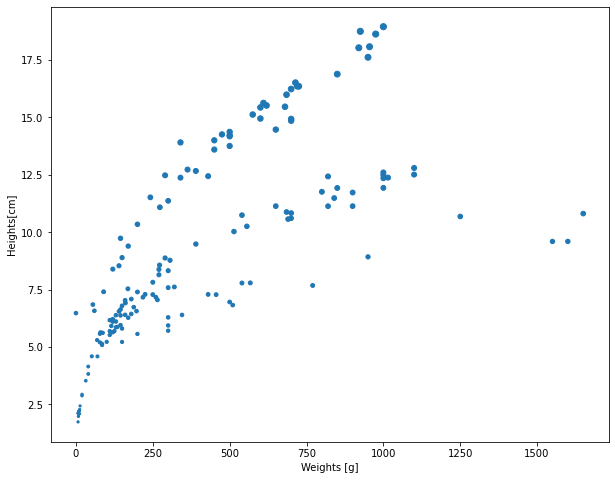

In [7]:
plt.figure(figsize = (10,8))
plt.scatter(Weights, Heights, s = Heights*2) 
plt.ylabel('Heights[cm]')
plt.xlabel('Weights [g]')
plt.show()

### 비율 맞춰주는 함수

In [8]:
def map_value(value, min_value, max_value, min_result, max_result):
    '''maps value (or array of values) from one range to another'''
    
    result = min_result + (value - min_value)/(max_value - min_value)*(max_result - min_result)
    return result
map_value(8,0,1,0,1)

8.0

In [9]:
weight_per_beat = 25
t_data = Weights/weight_per_beat

duration_beats = max(t_data)
print('Duration : {} beats'.format(duration_beats))
print(t_data)

Duration : 66.0 beats
[66.    64.    62.    50.    44.    44.    40.6   40.    40.    40.
 40.    40.    39.    38.2   38.    38.    37.    36.8   36.    36.
 34.    34.    33.6   32.8   32.8   32.    30.8   29.    28.8   28.56
 28.    28.    28.    28.    28.    27.6   27.4   27.4   27.2   26.
 26.    24.8   24.4   24.    24.    23.    22.68  22.24  21.6   21.6
 20.56  20.4   20.    20.    20.    20.    20.    19.    18.24  18.
 18.    17.2   17.2   15.6   15.6   14.52  13.8   13.6   13.6   12.8
 12.24  12.    12.    12.    12.    12.    12.    11.6   11.6   10.92
 10.88  10.8   10.8   10.6   10.4   10.    10.     9.68   9.     8.72
  8.     8.     8.     7.88   7.52   7.2    7.2    6.8    6.8    6.76
  6.44   6.4    6.4    6.     6.     6.     6.     5.8    5.8    5.8
  5.8    5.6    5.6    5.4    5.2    5.2    5.2    5.     4.8    4.8
  4.8    4.8    4.8    4.6    4.4    4.4    4.4    4.     3.6    3.48
  3.4    3.4    3.2    3.12   3.12   2.8    2.76   2.4    2.2    2.06
  1.6    1

In [10]:
bpm = 60
duration_sec = duration_beats * 60/bpm

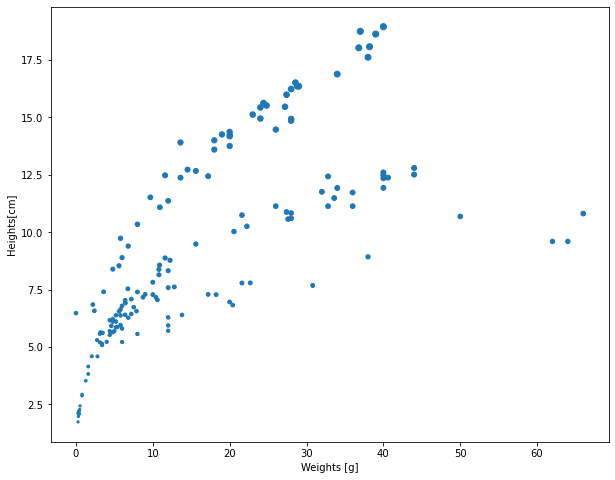

In [11]:
plt.figure(figsize = (10,8))
plt.scatter(t_data, Heights, s = Heights*2) 
plt.ylabel('Heights[cm]')
plt.xlabel('Weights [g]')
plt.show()

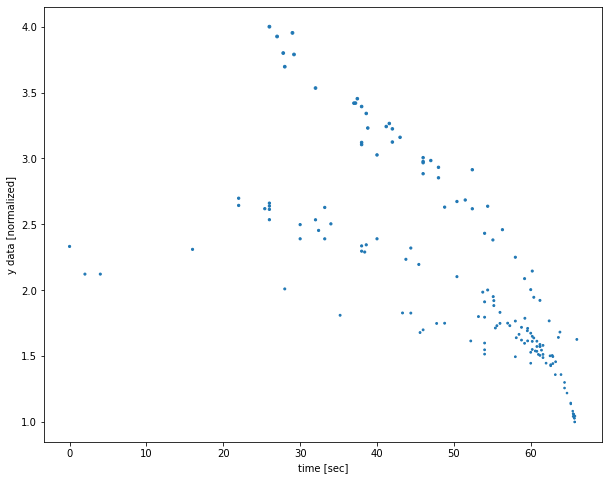

In [12]:
y_data = map_value(Heights, min(Heights),max(Heights),1, 2)
y_scale = 2
y_data = y_data**y_scale

t_data_reverse = max(t_data) - t_data

plt.figure(figsize = (10,8))
plt.scatter(t_data_reverse, y_data, s=y_data*2)
plt.xlabel('time [sec]')
plt.ylabel('y data [normalized]')
plt.show()

In [13]:
from audiolazy import str2midi
# 4 octaves of major scale
# note_names = ['C2','D2','E2','F2','G2','A2','B2',
#              'C3','D3','E3','F3','G3','A3','B3',
#              'C4','D4','E4','F4','G4','A4','B4',
#              'C5','D5','E5','F5','G5','A5','B5']

# #4 octaves of major pentatonic scale 
note_names = ['C1','D1','E1','G1','A1',
             'C2','D2','E2','G2','A2',
             'C3','D3','E3','G3','A3',
             'C4','D4','E4','G4','A4',
             'C5','D5','E5','G5','A5',
             'C6','D6','E6','G6','A6']
note_names = ['C1','D1','E1','F1','G1','A1','B1',
             'C2','D2','E2','F2','G2','A2','B2',
             'C3','D3','E3','F3','G3','A3','B3',
             'C4','D4','E4','F4','G4','A4','B4',
             'C5','D5','E5','F5','G5','A5','B5',
             'C6','D6','E6','F6','G6','A6','B6']

note_midis = [str2midi(n) for n in note_names] #make a list of midi note numbers 

n_notes = len(note_midis)
print('Resolution:',n_notes, 'notes')
# if you want higher just choose more number of midis
print(note_midis)

Resolution: 42 notes
[24, 26, 28, 29, 31, 33, 35, 36, 38, 40, 41, 43, 45, 47, 48, 50, 52, 53, 55, 57, 59, 60, 62, 64, 65, 67, 69, 71, 72, 74, 76, 77, 79, 81, 83, 84, 86, 88, 89, 91, 93, 95]


In [14]:
n_fish = len(df)
midi_data = []
for i in range(n_fish):
    note_index = round(map_value(y_data[i], min(y_data), max(y_data), n_notes-1, 0))
                                              ##  이부분으로 노트 위치 조정
                                              ##  큰 크리에이터가 높은음을 내려면 0,n_notes-1의 위치를 reverse해줘야함 
                                              ##  이 이유는 Midi의 숫자가 낮을수록 낮은 음이기 때문
    
#     print(note_index)
    midi_data.append(note_midis[note_index])

# print(midi_data)


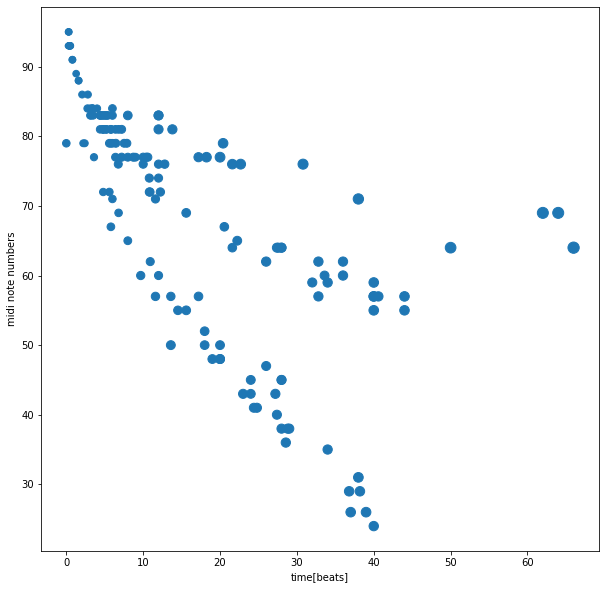

In [15]:
v_min = 35
v_max = 127
v_data = []
for i in range(n_fish):
    note_velocity = round(map_value(Lengths[i],min(Lengths),max(Lengths),v_min,v_max))
    v_data.append(note_velocity)

plt.figure(figsize = (10,10))
plt.scatter(t_data,midi_data,s=v_data)
plt.xlabel('time[beats]')
plt.ylabel('midi note numbers')
plt.show()

In [17]:
from midiutil import MIDIFile #import library to make midi file, https://midiutil.readthedocs.io/en/1.2.1/
    
#create midi file object, add tempo
my_midi_file = MIDIFile(1) #one track 
my_midi_file.addTempo(track=0, time=0, tempo=bpm*1.5) 

#add midi notes
for i in range(len(midi_data)):
    my_midi_file.addNote(track=0, channel=0, pitch=midi_data[i], time=t_data[i], duration=2, volume=v_data[i])

#create and save the midi file itself
with open(filename + '.mid', "wb") as f:
    my_midi_file.writeFile(f) 


In [18]:
import sys 

import pygame #import library for playing midi files, https://pypi.org/project/pygame/

pygame.init()
pygame.mixer.music.load(filename + '.mid')
pygame.mixer.music.play()

pygame 2.1.2 (SDL 2.0.18, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

In [ ]:
audio_files = glob('./*.mid')
audio_files

In [ ]:
ipd.Audio(audio_files[0])